In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [510]:
def randomly_crop_string(lst):
    crop_length = random.randint(2, 13)
    # print(crop_length)

    start_index = random.randint(0, len(lst) - crop_length)
    return lst[start_index:start_index + crop_length]

def get_diagonals(matrix):
    diagonals = []
    rows, cols = matrix.shape

    # # Upper diagonals
    # for i in range(cols):
    #     diagonal = matrix.diagonal(offset=i)
    #     if len(diagonal) >= 2:
    #         diagonals.append(diagonal)

    # Lower diagonals
    for i in range(1, rows):
        diagonal = matrix.diagonal(offset=-i)
        if len(diagonal) >= 1:
            diagonals.append(diagonal)

    return diagonals



In [534]:
def display_heatmap(matrix,figsize=(9,6)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.show()

def create_arr(randomise=False):
    if randomise:
        l = random.choices([0,1,2,3,4,5,6,7,8,9],k=random.randint(2,15))
        l = [1,9,3,4,5,8,6,7,2,1]
        l = [9,9,9,9,9,1,0,0,0,0]
        l = [0,4,9,6]
        
    else:
        l = [str(x) for x in range(1, 2 + random.randint(1, 10000))]
        l = ''.join(l)

        try:
            l = [int(x) for x in randomly_crop_string(l)]
        except ValueError:
            print(l)
            print('error')

    return len(l), np.array([list(l)],dtype=int).reshape(1,-1)

def findString(randomise=False,visualise=True):
    n, array = create_arr(randomise=randomise)
    ones = np.ones(shape=(n,1),dtype=int)
    m1 = array.T @ ones.T - ones @ array

    if visualise:
        print(array)
        display_heatmap(m1)

    return m1, array

[[0 4 9 6]]


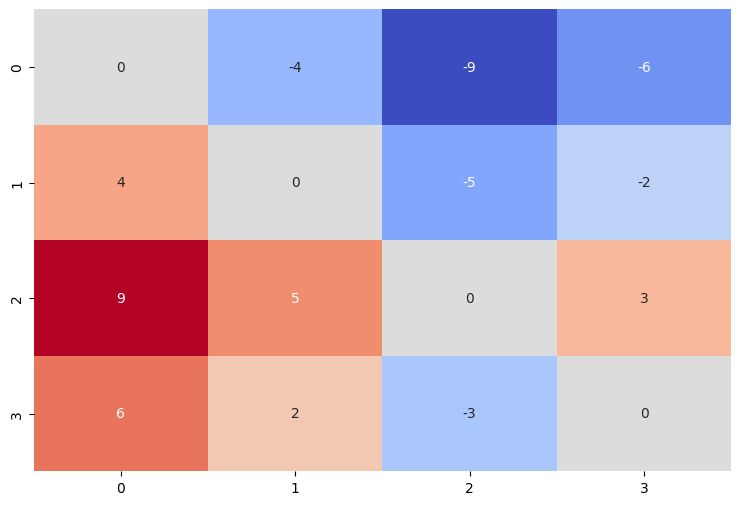

[array([ 4,  5, -3]), array([9, 2]), array([6])]


In [535]:
m1, array = findString(randomise=True,visualise=True)
l_arrays = get_diagonals(m1)

print(l_arrays) # offdiagonalness is the length of the number; first number after 1 is start of new number 

# you take the first one where there is no 1 before the -1 

In [536]:
[1,-8] # if you see this then all the integers need to 9s before the last digit, if so its a unique number, otherwise is is not 

[1, -8]

In [537]:
m1, array = findString(randomise=False,visualise=False)
diag = get_diagonals(m1)

In [538]:
print(array.tolist())

[[4, 5, 7, 4, 6, 7, 4, 7, 7, 4, 8, 7, 4]]


In [639]:
find_index = False


for i in range(1):
    # if i % 10000 == 0:
    #     print('checkpoint')
    m1, array = findString(randomise=False,visualise=False)
    diag = get_diagonals(m1)

    # print(array.tolist())

    # print(diag)
    candidates = []
    singular = False

    for i in range(len(diag)):
        flag = True
        for j  in range(len(diag[i])):
            if diag[i][j] not in [1,0,-9,-8]:
                flag = False
        if flag == True:
            candidates.append(diag[i])
        else:
            pass

    if len(candidates) == 0:
        number = int(''.join([str(x) for x in array[0].tolist()]))
        singular = True

    if not singular:

        # print(candidates[0], len(candidates[0]), len(array.tolist()[0]))

        try:

            number_start = candidates[0].tolist().index(1) + 1
            number_length = len(array.tolist()[0]) - len(candidates[0])

            number = int(''.join([str(x) for x in array.tolist()[0][number_start: number_start+number_length]]))

        
        except ValueError:
            number_length = len(array.tolist()[0]) - len(candidates[0])
            number = array[0][:number_length]
            number = int(''.join([str(x) for x in number.tolist()]))

print(number, array)




if find_index:

    len_num = len(str(number))
    print(f'len of number is {len_num}')

    sum = 9

    for i in range(1,len_num):
        print(i)
        sum += 9 * 10**i

        
        print(sum)




404 [[4 0 3 4 0 4 4 0 5]]


In [648]:
number = 100


''.join([str(x) for x in range(1, number + 1)])

'123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100'

2

1000 1000


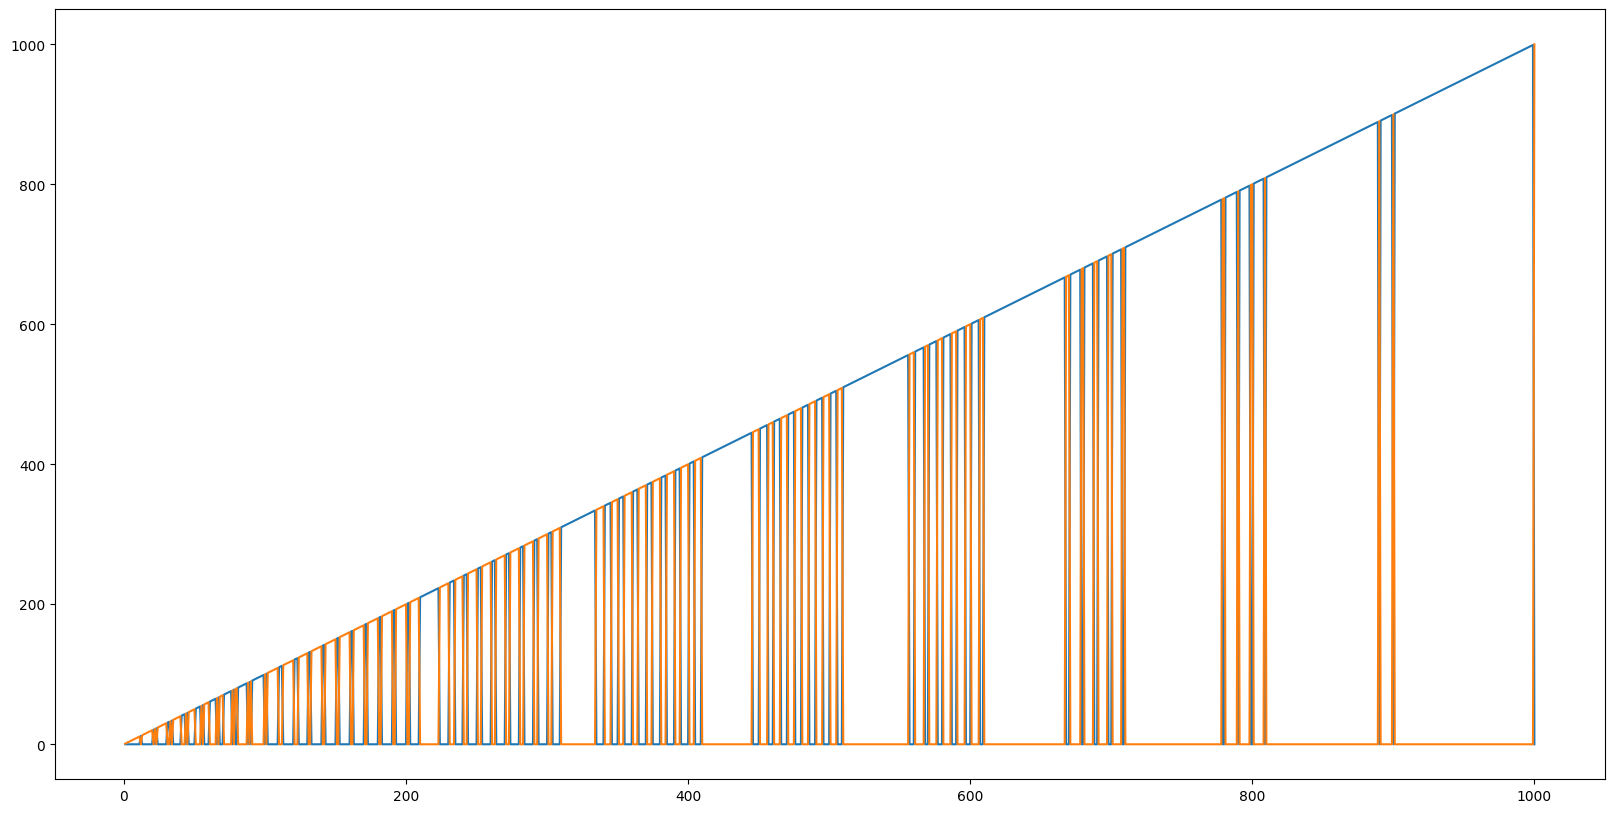

In [697]:
import matplotlib.pyplot as plt

def aupto(low, limit):
    s, alst, regs  = "", [], []
    for k in range(low, limit+1):
        sk = str(k)
        if sk in s: 
            alst.append(int(k))
            regs.append(0)
        else: 
            regs.append(int(sk))
            alst.append(0)
        s += sk
    return alst, regs


low=1
limit=1000

eb,neb = aupto(low=low,limit=limit)

print(len(eb), len(neb))

plt.figure(figsize=(20,10))
plt.plot(np.array([x for x in range(low,limit + 1)]), [0 if x==0 else x for x in eb])
plt.plot(np.array([x for x in range(low,limit + 1)]), [0 if x==0 else x for x in neb])

In [663]:
[x for x in range(1,len(xs)+1)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]